In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ds = '/content/drive/MyDrive/Colab Notebooks/Crime_Data_from_2020_to_Present.csv'
pd.options.display.max_columns = None
d = pd.read_csv(ds)
#d.head(2)

<ipython-input-2-17de02813af4>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv(ds)


deleting rows more than 70% Nan

In [ ]:
threshold_pct = 0.7
missing_counts = d.isna().sum(axis=1)
d = d[missing_counts / len(d.columns) < threshold_pct]

Time of occurence

In [ ]:
def f(x):
    if (x > 4) and (x <= 8) or (x > 400) and (x <= 800):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ) or (x > 800) and (x <= 1200 ):
        return 'Morning'
    elif (x > 12) and (x <= 16) or (x > 1200) and (x <= 1600):
        return'Afternoon'
    elif (x > 16) and (x <= 20) or (x > 1600) and (x <= 2000):
        return 'Evening'
    elif (x > 20) and (x <= 24) or (x > 2000) and (x <= 2400):
        return'Night'
    elif (x <= 4) or (x <= 400):
        return'Late Night'

d['hour'] = d['TIME OCC'].apply(f)

Cleaning location column

In [ ]:
def clean_location(location_string):
  parts = location_string.split(' ')
  parts = [part for part in parts if part]
  street_number = parts[0]
  direction = parts[1] if len(parts) > 1 else None
  street_name = ' '.join(parts[2:])
  cleaned_location = f"{street_number} {' '.join([direction, street_name]) if direction else street_name}"
  return cleaned_location

d['LOCATION'] = d['LOCATION'].apply(clean_location)
#d.head()

Merging Area location etc

In [ ]:
d['AREA_LOCATION'] = d.apply(lambda row: ' '.join([str(row['AREA']), str(row['AREA NAME']), str(row['LOCATION'])]), axis=1)

Keeping only male and female victims

In [ ]:
d = d[d['Vict Sex'].isin(['M', 'F'])]

Replaceing missing values

In [ ]:
d['Premis Cd'] = d['Premis Cd'].fillna(0)

<ipython-input-8-afe0a50ace8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Premis Cd'] = d['Premis Cd'].fillna(0)


Taking a sample

In [ ]:
sample_d_1 = d.sample(10000)
#sample_d_1.head(2)

Dropping columns

In [ ]:
imp_sample_d_1 = sample_d_1.drop(['DR_NO', 'Date Rptd','DATE OCC', 'TIME OCC','AREA','Rpt Dist No', 'Part 1-2','Crm Cd Desc',
                                  'Vict Age','Vict Descent', 'Premis Desc', 'Weapon Desc','Weapon Used Cd', 'Status', 'Status Desc', 'Crm Cd 1',
                                  'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4','LOCATION','Cross Street','AREA NAME', 'LAT','LON', 'Mocodes' ],axis = 1)


In [ ]:
imp_sample_d_2 = imp_sample_d_1

Gender Encoding

In [ ]:
#one hot encoding
victim_encoded_df = pd.get_dummies(imp_sample_d_1, columns = ['Vict Sex'], dtype = 'int')
victim_encoded_df = victim_encoded_df.drop(['Crm Cd','Premis Cd','hour','AREA_LOCATION'], axis=1)
victim_encoded_df.head(2)

Vict Sex_F  Vict Sex_M
342112           1           0
112692           0           1

Hour encoding

In [ ]:
#one hot encoding
hour_encoded_df = pd.get_dummies(imp_sample_d_1, columns = ['hour'], dtype = 'int')
hour_encoded_df = hour_encoded_df.drop(['Crm Cd','Premis Cd','Vict Sex','AREA_LOCATION'], axis=1)
hour_encoded_df.head(2)

hour_Afternoon  hour_Early Morning  hour_Evening  hour_Late Night  \
342112               0                   0             0                1   
112692               1                   0             0                0   

        hour_Morning  hour_Night  
342112             0           0  
112692             0           0

Area Location encoding

In [ ]:
place_encoded_df = pd.get_dummies(imp_sample_d_1, columns = ['AREA_LOCATION'], dtype = 'int')
place_encoded_df = place_encoded_df.drop(['Crm Cd','Premis Cd','Vict Sex','hour'], axis=1)
place_encoded_df.head(2)

AREA_LOCATION_1.0 Central 00 GATEWAY PLZ  \
342112                                         0   
112692                                         0   

        AREA_LOCATION_1.0 Central 00 OLVERA ST  \
342112                                       0   
112692                                       0   

        AREA_LOCATION_1.0 Central 100 E 2ND ST  \
342112                                       0   
112692                                       0   

        AREA_LOCATION_1.0 Central 100 E 6TH ST  \
342112                                       0   
112692                                       0   

        AREA_LOCATION_1.0 Central 100 E OLYMPIC BL  \
342112                                           0   
112692                                           0   

        AREA_LOCATION_1.0 Central 100 E PASEO DE LA PLAZA  \
342112                                                  0   
112692                                                  0   

        AREA_LOCATION_1.0 Central 100 N HILL ST  \
342112                                        0   
112692                                        0   

        AREA_LOCATION_1.0 Central 100 N LOS ANGELES ST  \
342112                                               0   
112692                                               0   

        AREA_LOCATION_1.0 Central 100 S CENTRAL AV  \
342112                                           0   
112692                                           0   

        AREA_LOCATION_1.0 Central 100 S FIGUEROA ST  \
342112                                            0   
112692                                            0   

        AREA_LOCATION_1.0 Central 100 S HEWITT ST  \
342112                                          0   
112692                                          0   

        AREA_LOCATION_1.0 Central 100 S LOS ANGELES ST  \
342112                                               0   
112692                                               0   

        AREA_LOCATION_1.0 Central 100 S SAN PEDRO ST  \
342112                                             0   
112692                                             0   

        AREA_LOCATION_1.0 Central 100 S SPRING ST  \
342112                                          0   
112692                                          0   

        AREA_LOCATION_1.0 Central 100 W 1ST ST  \
342112                                       0   
112692                                       0   

        AREA_LOCATION_1.0 Central 100 W 4TH ST  \
342112                                       0   
112692                                       0   

        AREA_LOCATION_1.0 Central 100 W 5TH ST  \
342112                                       0   
112692                                       0   

        AREA_LOCATION_1.0 Central 100 W 7TH ST  \
342112                                       0   
112692                                       0   

        AREA_LOCATION_1.0 Central 100 W CESAR E CHAVEZ AV  \
342112                                                  0   
112692                                                  0   

        AREA_LOCATION_1.0 Central 1000 ALPINE ST  \
342112                                         0   
112692                                         0   

        AREA_LOCATION_1.0 Central 1000 E ALHAMBRA AV  \
342112                                             0   
112692                                             0   

        AREA_LOCATION_1.0 Central 1000 FIGUEROA TR  \
342112                                           0   
112692                                           0   

        AREA_LOCATION_1.0 Central 1000 MARVIEW AV  \
342112                                          0   
112692                                          0   

        AREA_LOCATION_1.0 Central 1000 N BROADWAY  \
342112                                          0   
112692                                          0   

        AREA_LOCATION_1.0 Central 1000 N VIGNES ST  \
342112                                           0   
112692                  

Keeping only Crime and Premis in main df since others are encoded

In [ ]:
imp_sample_d_1 = imp_sample_d_1.drop(['Vict Sex','hour','AREA_LOCATION'], axis=1)

In [ ]:
imp_sample_d_1.head(2)

Crm Cd  Premis Cd
342112   341.0      503.0
112692   930.0      203.0

Combining all the encoded dataframes together in a df

In [ ]:
categorical_df = pd.concat([victim_encoded_df,hour_encoded_df,place_encoded_df],axis=1)

Combining the encoded categorical df with main df(codes)

In [ ]:
combined_df = pd.concat([categorical_df, imp_sample_d_1], axis=1)

In [ ]:
combined_df.head(1)

Vict Sex_F  Vict Sex_M  hour_Afternoon  hour_Early Morning  \
342112           1           0               0                   0   

        hour_Evening  hour_Late Night  hour_Morning  hour_Night  \
342112             0                1             0           0   

        AREA_LOCATION_1.0 Central 00 GATEWAY PLZ  \
342112                                         0   

        AREA_LOCATION_1.0 Central 00 OLVERA ST  \
342112                                       0   

        AREA_LOCATION_1.0 Central 100 E 2ND ST  \
342112                                       0   

        AREA_LOCATION_1.0 Central 100 E 6TH ST  \
342112                                       0   

        AREA_LOCATION_1.0 Central 100 E OLYMPIC BL  \
342112                                           0   

        AREA_LOCATION_1.0 Central 100 E PASEO DE LA PLAZA  \
342112                                                  0   

        AREA_LOCATION_1.0 Central 100 N HILL ST  \
342112                                        0   

        AREA_LOCATION_1.0 Central 100 N LOS ANGELES ST  \
342112                                               0   

        AREA_LOCATION_1.0 Central 100 S CENTRAL AV  \
342112                                           0   

        AREA_LOCATION_1.0 Central 100 S FIGUEROA ST  \
342112                                            0   

        AREA_LOCATION_1.0 Central 100 S HEWITT ST  \
342112                                          0   

        AREA_LOCATION_1.0 Central 100 S LOS ANGELES ST  \
342112                                               0   

        AREA_LOCATION_1.0 Central 100 S SAN PEDRO ST  \
342112                                             0   

        AREA_LOCATION_1.0 Central 100 S SPRING ST  \
342112                                          0   

        AREA_LOCATION_1.0 Central 100 W 1ST ST  \
342112                                       0   

        AREA_LOCATION_1.0 Central 100 W 4TH ST  \
342112                                       0   

        AREA_LOCATION_1.0 Central 100 W 5TH ST  \
342112                                       0   

        AREA_LOCATION_1.0 Central 100 W 7TH ST  \
342112                                       0   

        AREA_LOCATION_1.0 Central 100 W CESAR E CHAVEZ AV  \
342112                                                  0   

        AREA_LOCATION_1.0 Central 1000 ALPINE ST  \
342112                                         0   

        AREA_LOCATION_1.0 Central 1000 E ALHAMBRA AV  \
342112                                             0   

        AREA_LOCATION_1.0 Central 1000 FIGUEROA TR  \
342112                                           0   

        AREA_LOCATION_1.0 Central 1000 MARVIEW AV  \
342112                                          0   

        AREA_LOCATION_1.0 Central 1000 N BROADWAY  \
342112                                          0   

        AREA_LOCATION_1.0 Central 1000 N VIGNES ST  \
342112                                           0   

        AREA_LOCATION_1.0 Central 1000 S BROADWAY  \
342112                                          0   

        AREA_LOCATION_1.0 Central 1000 S FLOWER ST  \
342112                                           0   

        AREA_LOCATION_1.0 Central 1000 S GRAND AV  \
342112                                          0   

        AREA_LOCATION_1.0 Central 1000 S OLIVE ST  \
342112                                          0   

        AREA_LOCATION_1.0 Central 1000 S SANTEE ST  \
342112                                           0   

        AREA_LOCATION_1.0 Central 1000 SANTEE ST  \
342112                                         0   

        AREA_LOCATION_1.0 Central 1000 W 2ND ST  \
342112                                        0   

        AREA_LOCATION_1.0 Central 1000 W COLLEGE ST  \
342112                                            0   

        AREA_LOCATION_1.0 Central 1000 WHITE KNOLL DR  \
342112                                              0   

        AREA_LOCATION_1.0 Central 1100 MAPLE AV  \
342112 

FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

allcomb = sc.fit_transform(combined_df)

PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(allcomb)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head(2)

principal component 1  principal component 2
0               1.274333              -0.281236
1              -1.162219              -2.424778

<ipython-input-23-169242d9ede4>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], s=50, cmap='viridis')


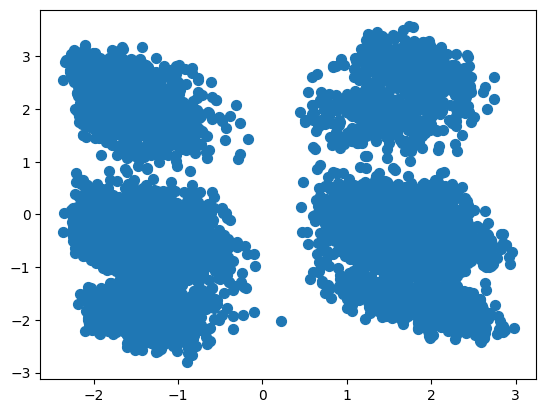

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], s=50, cmap='viridis')
#plt.scatter(principalDf[:,0],principalDf[:,1])
plt.show()

KMEANS

KMEANS Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

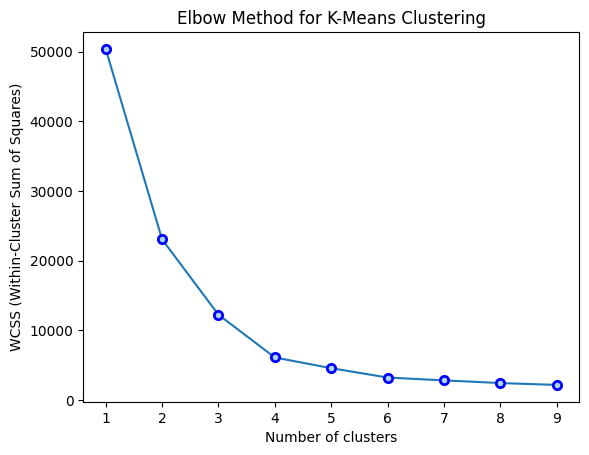

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_range = range(1, 10)

wcss = []
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(principalDf)
  wcss.append(kmeans.inertia_)

plt.plot(k_range, wcss, 'o-', markerfacecolor='lightblue', markeredgewidth=2, markeredgecolor='blue')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for K-Means Clustering")
plt.show()

Algo

In [ ]:
from sklearn.cluster import KMeans

k=11
kmeans = KMeans(n_clusters=4)
kmeans.fit(principalDf)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

imp_sample_d_2['cluster_k'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
SilhouetteTable = pd.DataFrame()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


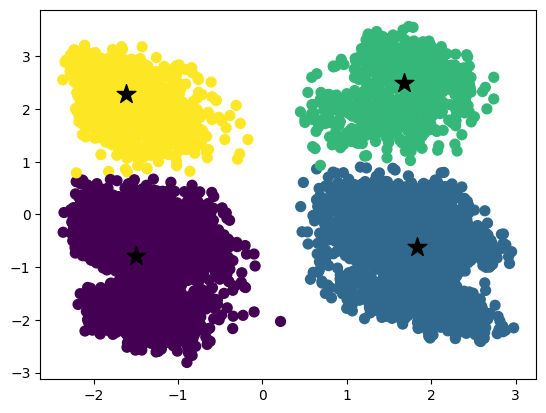

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


#X, y = make_blobs(n_samples=300, centers=4, random_state=0)

# KMeans instance with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(principalDf)

# cluster labels
y_pred = kmeans.predict(principalDf)


plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=y_pred, s=50, cmap='viridis')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c='black')
plt.show()


Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

SilhouetteTable['Kmean'] =  [silhouette_score(principalDf,kmeans.labels_ )]

DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=4).fit(principalDf)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

imp_sample_d_2['cluster_d']= labels

Estimated number of clusters: 20
Estimated number of noise points: 223


Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

SilhouetteTable['DBSCAN'] = [silhouette_score(principalDf, db.labels_)]

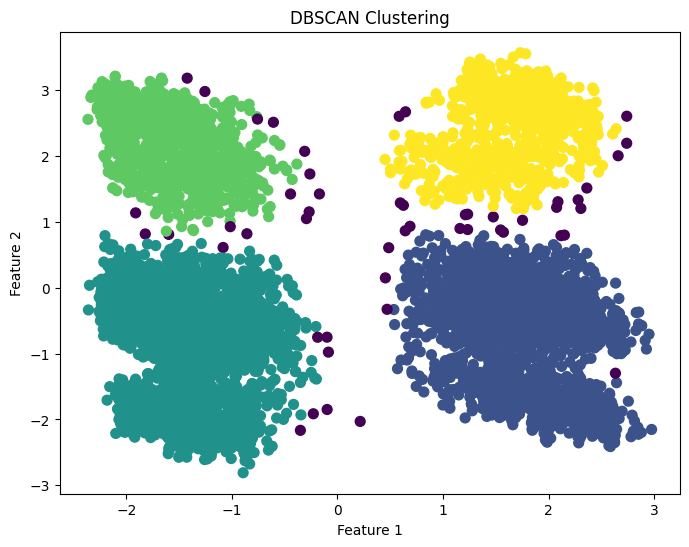

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(principalDf)


scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)


# DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=4)
clusters = dbscan.fit_predict(data_scaled)


df['cluster'] = clusters


# db = DBSCAN(eps=0.1, min_samples=4).fit(principalDf)
# labels = db.labels_

# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)


# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis', s=50)

#plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1]
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()


HIERARCHICAL AGGLOMERATIVE - WARD

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4, linkage='ward')

model.fit(principalDf)

imp_sample_d_2['cluster_hw'] = model.labels_

Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
SilhouetteTable['Hierarchical_W'] = [silhouette_score(principalDf,model.labels_)]

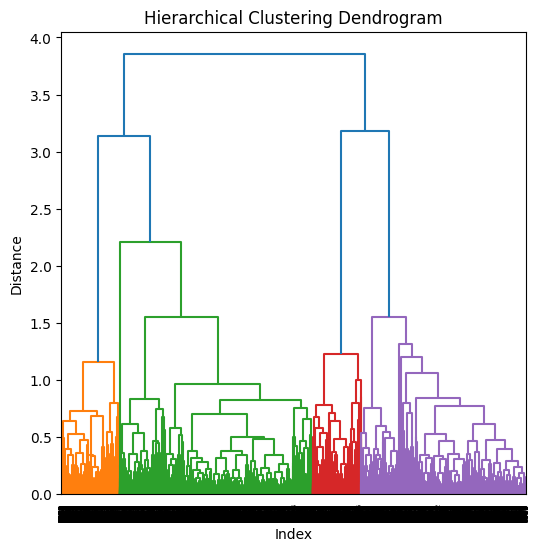

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# hierarchical agglomerative clustering
Z = linkage(principalDf, method='average')

plt.figure(figsize=(6, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()


HDBSCAN


In [ ]:
pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.0 MB/s eta 0:00:00


In [ ]:
import hdbscan

In [ ]:

clusterer = hdbscan.HDBSCAN()

# clustering
cluster_labels = clusterer.fit_predict(principalDf)

Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

SilhouetteTable['HDBSCAN'] = [silhouette_score(principalDf, cluster_labels )]

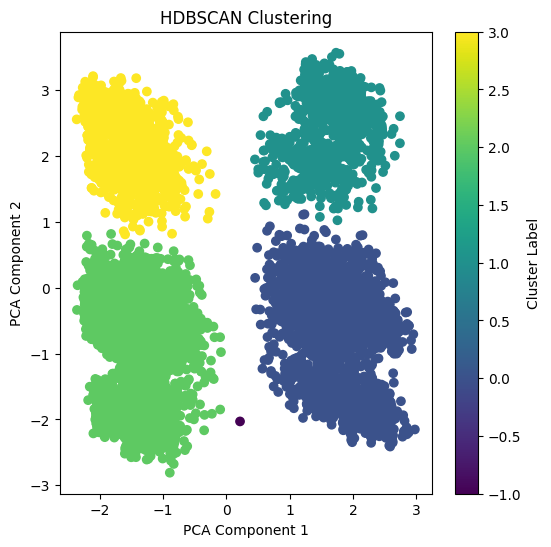

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hdbscan


clusterer = hdbscan.HDBSCAN()

# clustering
cluster_labels = clusterer.fit_predict(principalDf)


plt.figure(figsize=(6, 6))
scatter = plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter, label='Cluster Label')
plt.title('HDBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

OPTICS

In [ ]:
from sklearn.cluster import OPTICS

clustering = OPTICS()

labels = clustering.fit_predict(principalDf)

#imp_sample_d_o['cluster1_o'] = labels


Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

SilhouetteTable['OPTICS'] = [silhouette_score(principalDf, labels )]

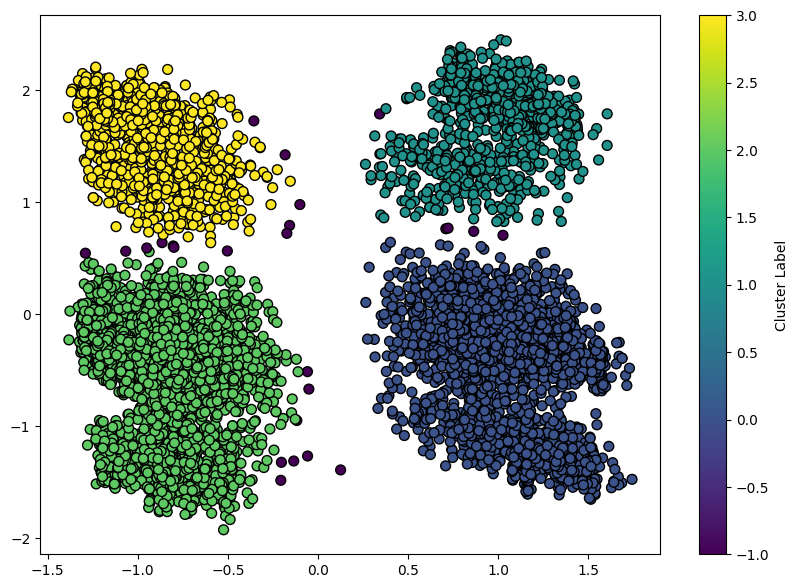

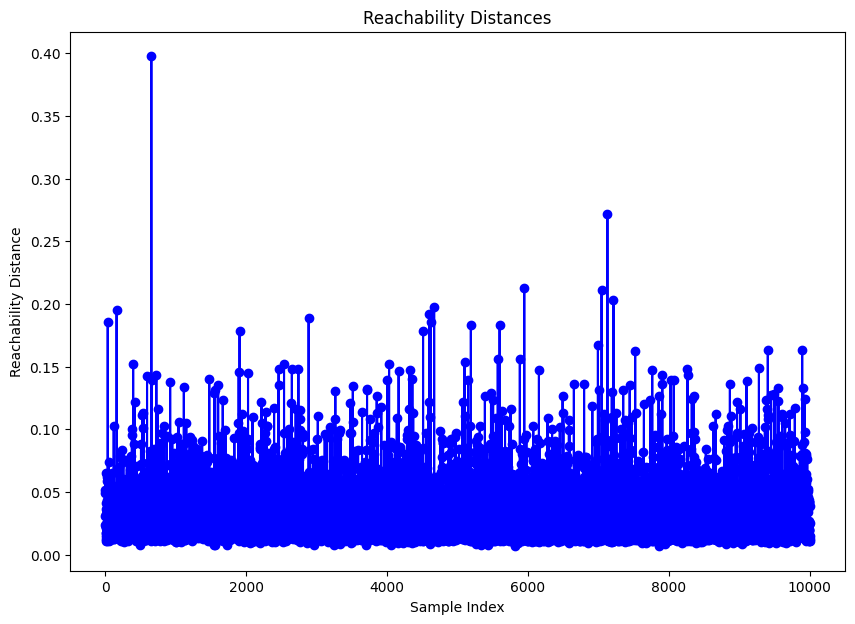

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler


X = StandardScaler().fit_transform(principalDf)

# X = StandardScaler().fit_transform(imp_sample_d_1)


optics = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.05)
optics.fit(X)

# cluster labels and reachability distances
labels = optics.labels_
reachability = optics.reachability_

# scatter plot of the data
plt.figure(figsize=(10, 7))

# Scatter plot of data points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')

# Adding colorbar
plt.colorbar(label='Cluster Label')

# plotting reachability distances for further analysis
plt.figure(figsize=(10, 7))
plt.plot(reachability, 'bo-')
plt.xlabel('Sample Index')
plt.ylabel('Reachability Distance')
plt.title('Reachability Distances')

plt.show()


In [ ]:
SilhouetteTable

Kmean    DBSCAN  Hierarchical_W   HDBSCAN   OPTICS
0  0.672701 -0.030595        0.672786  0.553277 -0.23716

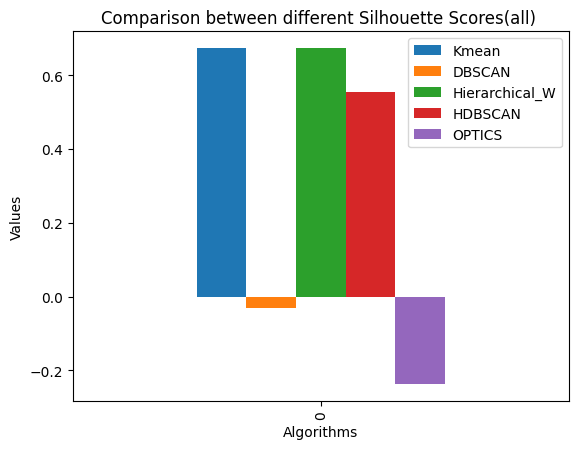

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



SilhouetteTable.plot(kind='bar')


plt.title('Comparison between different Silhouette Scores(all) ')
plt.xlabel('Algorithms')
plt.ylabel('Values')

plt.show()


In [ ]:
# print(imp_sample_d_1['Crm Cd'].value_counts().to_string(max_rows=None))